## Instalación
#### Tener instalado python.
Lo más recomendable es haberlo instalado a través de Anaconda, ya que es la plataforma de distribución de Python más completa

<b>Anaconda<b/>: https://www.anaconda.com/products/individual

A través de la consola de Anaconda (Anaconda prompt) se realiza la instalación de dinsar.

Es recomendable generar un nuevo ambiente puesto que geopandas puede entablar conflicto con las versiones de otras librerías. Lo puedes hacer a través de la consola de anaconda, y tendrás que instalar jupyter y spyder si quieres usar este ambiente en esos dos entornos de desarrollo.
Para más información sobre cómo crear un nuevo ambiente: https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands


#### Instalación de dinsar
pip install dinsar

#### Documentación
Enlace a github, que es donde colgaré el código y los ejemplos de uso.

In [1]:
import dinsar

## Definición de las partes del modelo según el pequeño ejemplo que he preparado
###  1. Datasets

In [3]:
# Definir rutas
fname_1 = dinsar.example.get_path('sentinel-asc')
Asc = dinsar.Dataset(fname_1, alias='Asc', color='#99F550')

fname_2 = dinsar.example.get_path('sentinel-desc')
Desc = dinsar.Dataset(fname_2, alias='Desc', color='#FBA608')


###  2. Piezometría

In [12]:
fname = dinsar.example.get_path('piezometria_bd')
bbdd = dinsar.Piezometria(fname, alias='Piezo_bbdd', sep='\t')

shp_fname = dinsar.example.get_path('piezometria_shp')
bbdd.append_geometry(shp_fname) 

Geometría añadida correctamente.


###  3. Precipitación

In [13]:
fname = dinsar.example.get_path('precipitacion_bd')
precipi = dinsar.Precipitacion(fname, alias='P', sep='\t')

shp_precipi = dinsar.example.get_path('precipitacion_shp')
precipi.append_geometry(shp_precipi)

Geometría añadida correctamente.


## Definición del Modelo

In [14]:
# Capa de los polígonos --> Agregados
fname = dinsar.example.get_path('agregados')

###--- MODELO ----###
Doñana = dinsar.Model(fname)

#- Adición de las partes del modelo -#
Doñana.append(Asc)      # Ascending 2014-2020
Doñana.append(Desc)     # Descending 2017-2020
Doñana.append(bbdd) # Piezometría (bbdd_wavelets)
Doñana.append(precipi)  # Precipitación (Junta de Andalucía)

## Otra manera rápida de definición del modelo de ejemplo (nuevo)

In [9]:
Doñana = dinsar.example.get_model()

Geometría añadida correctamente.
Geometría añadida correctamente.


## Funcionalidades varias:

<AxesSubplot:title={'center':'Agregado 2'}, ylabel='Deformación (cm)'>

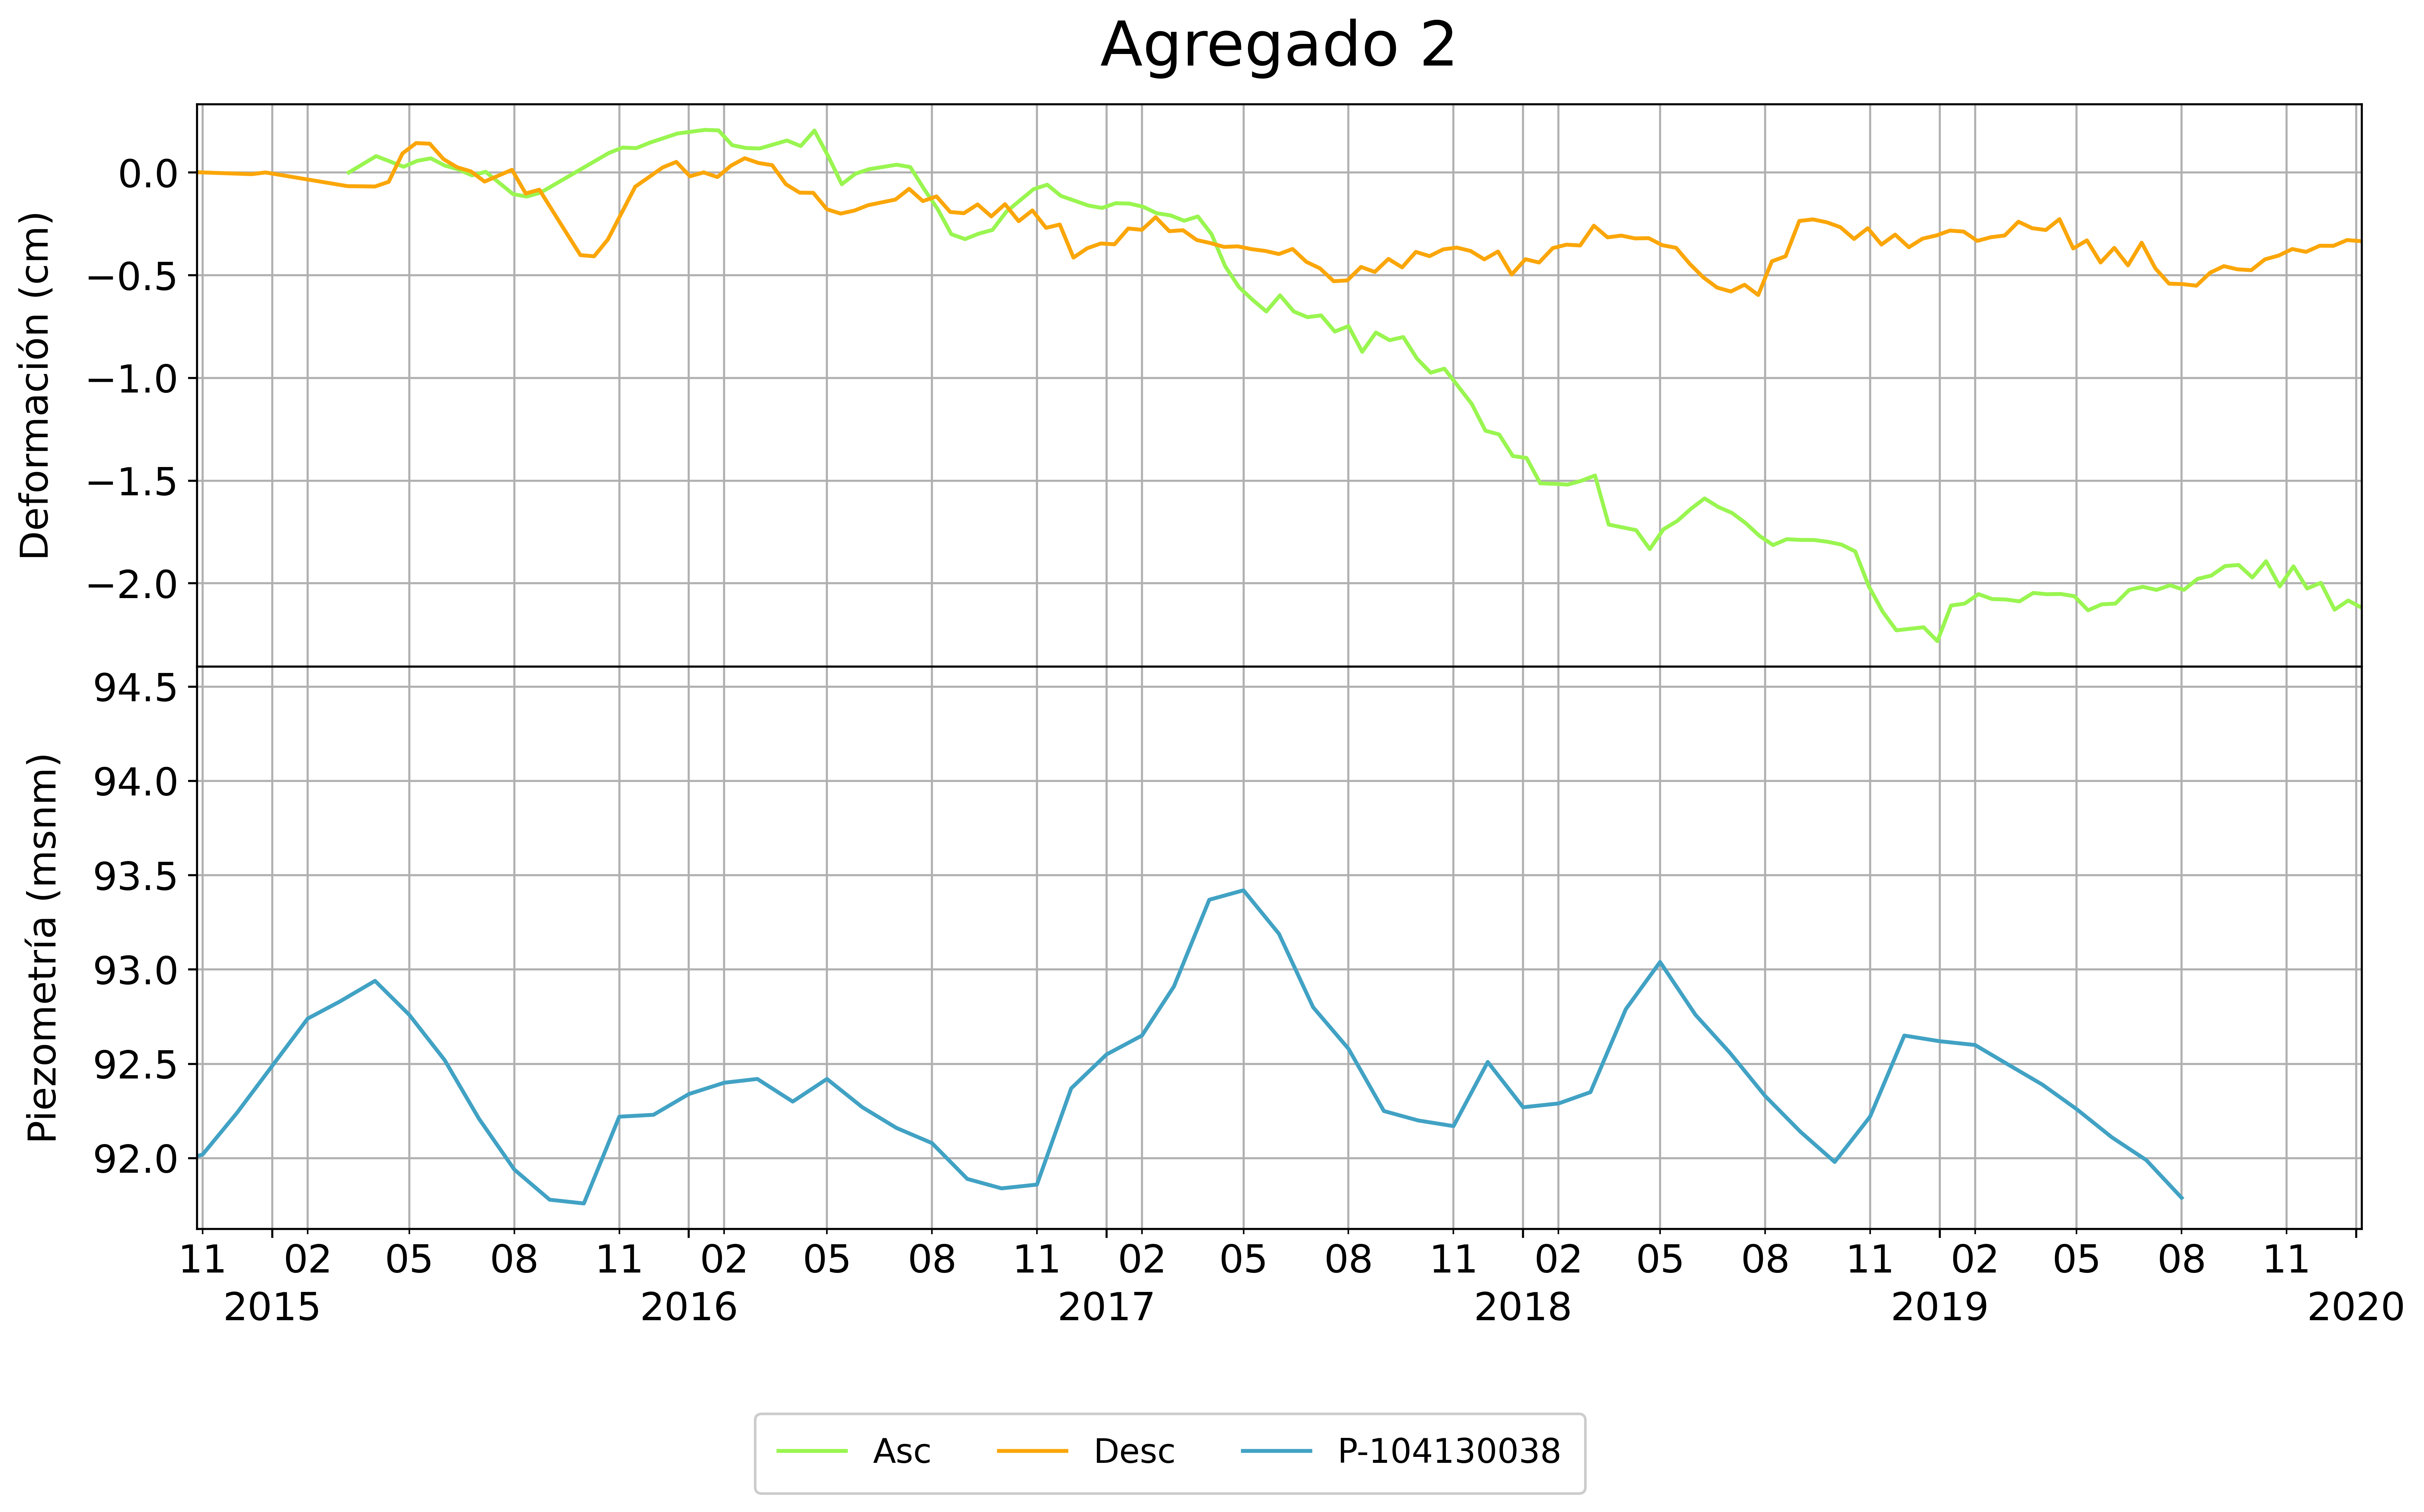

In [25]:
Doñana.study(2).plot() # Plotear las series temporales del agregado 2

In [26]:
Doñana.study(2).mapa() # Representar espacialmente el agregado 2 y sus PS.

<AxesSubplot:title={'center':'Puntos SAR'}, ylabel='Deformación (cm)'>

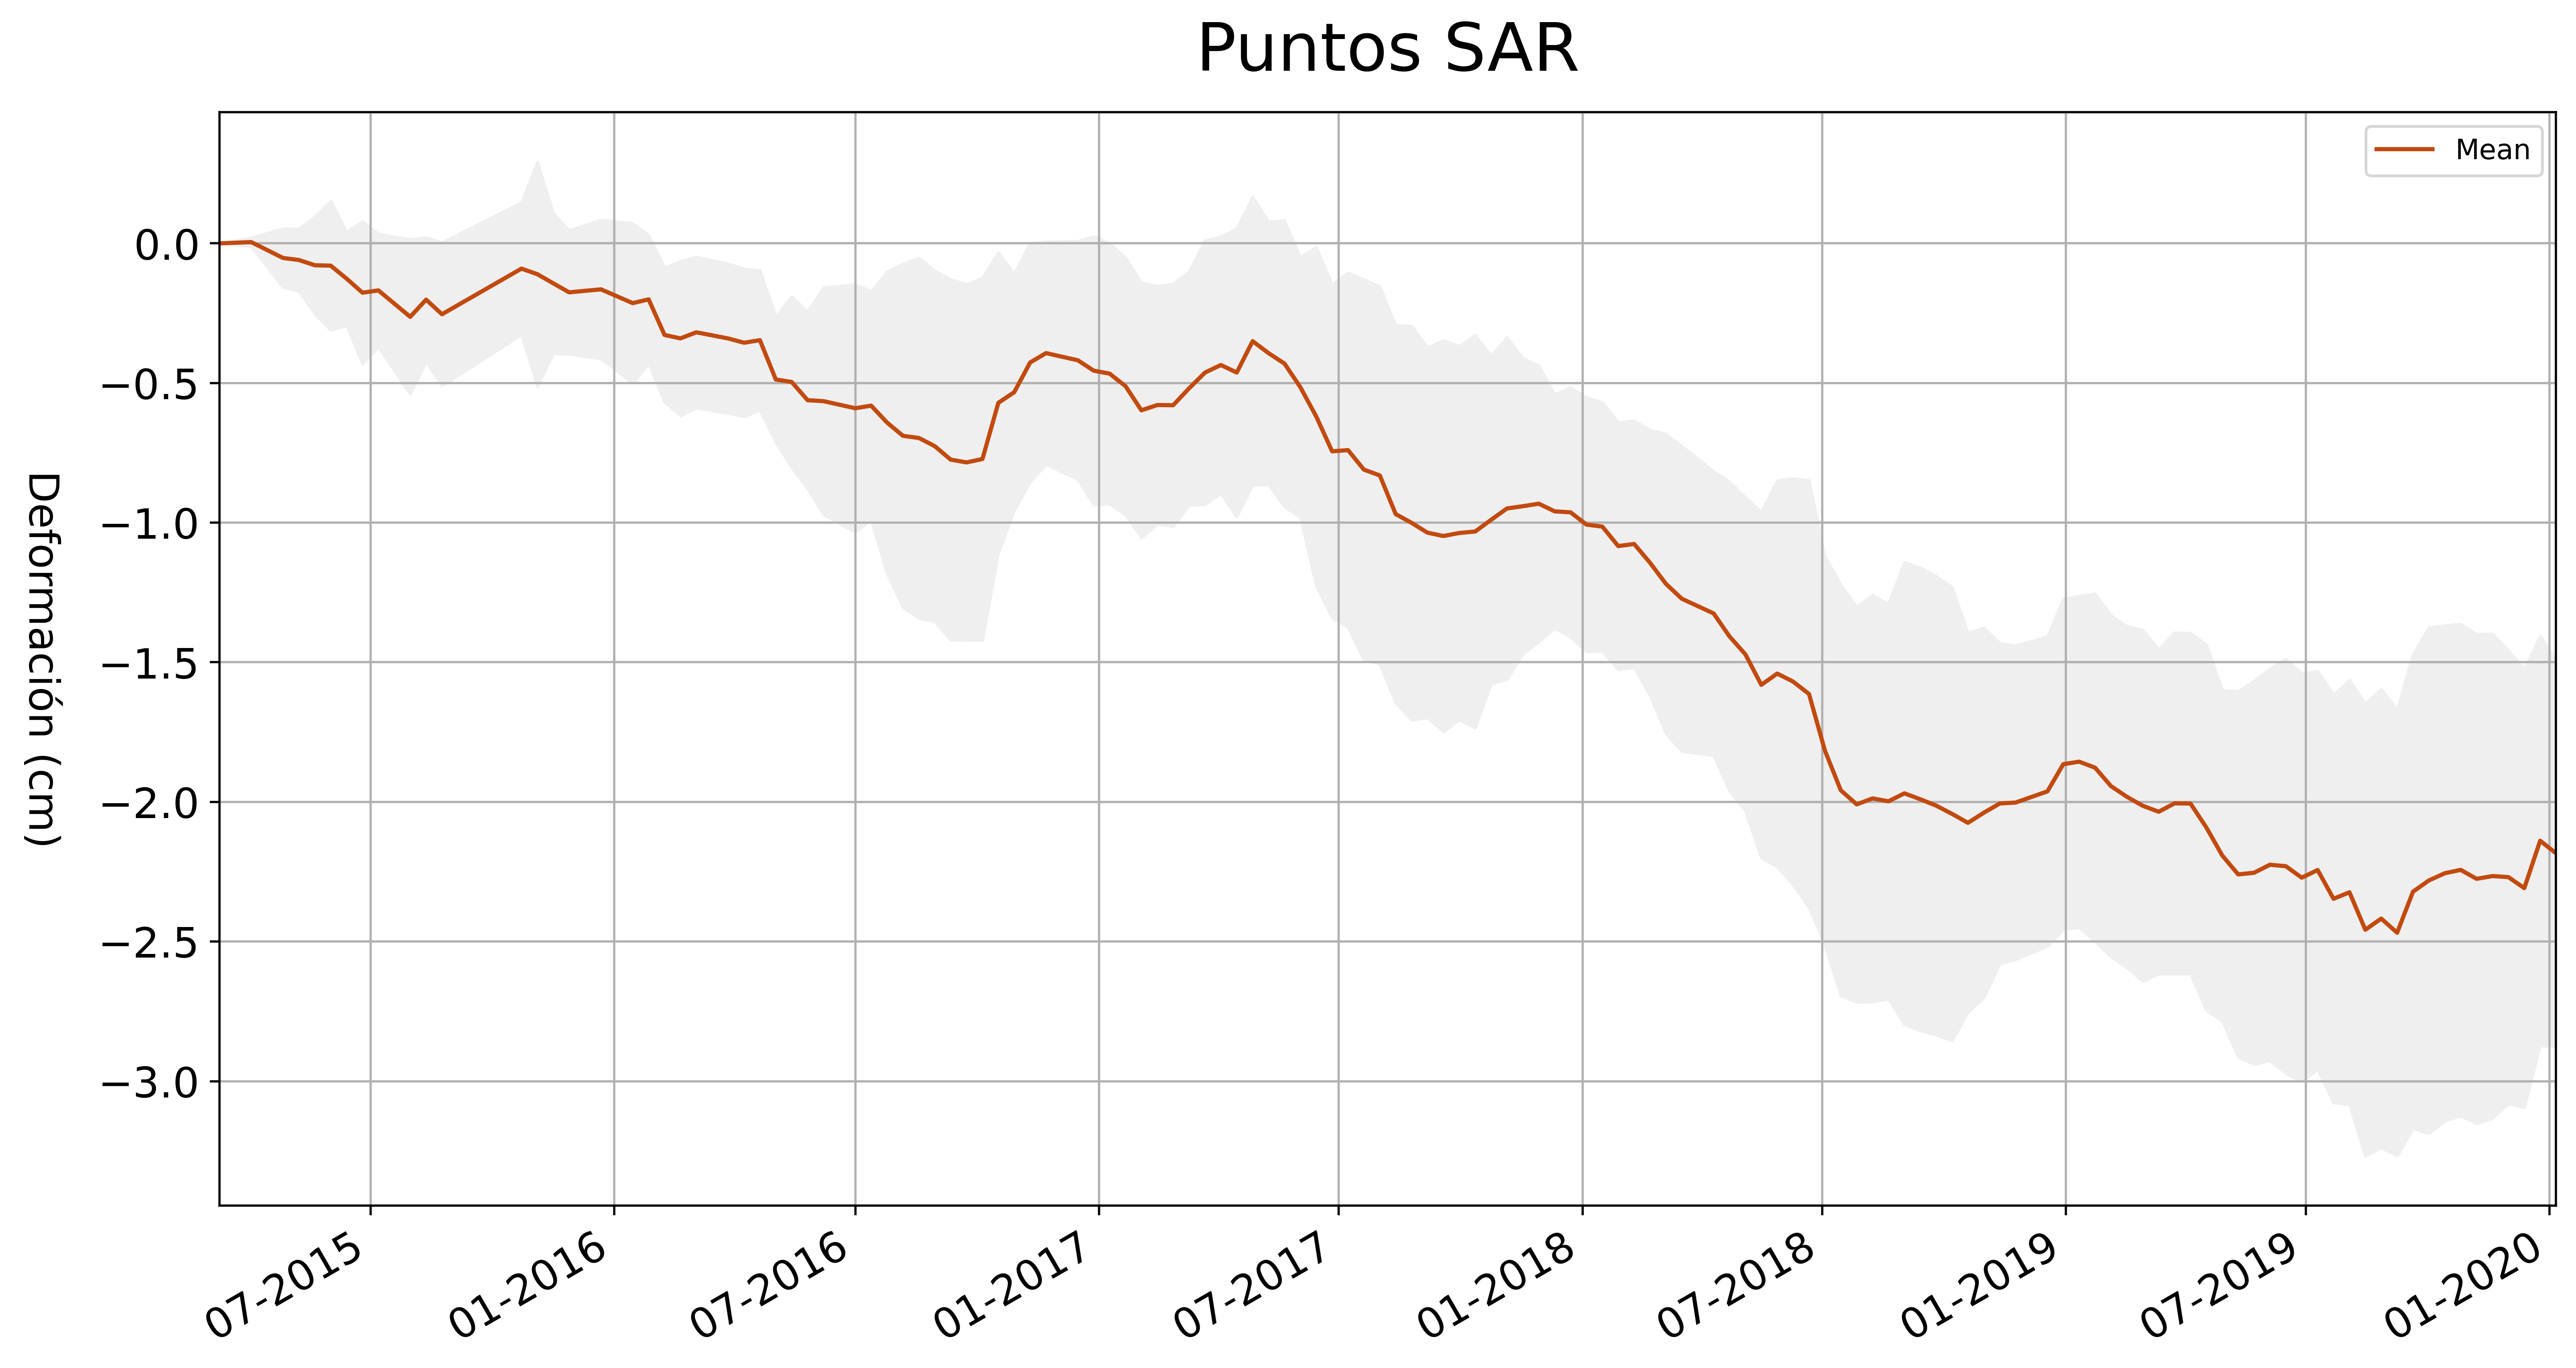

In [30]:
 # Cojo los cinco primeros PS del Dataset 'Ascending' (dessde fuera del modelo ) y calculo su deformación promedio
ps = Asc.ps[0:5] 
Asc.subset(ps).plot(plot_average=True)

<AxesSubplot:title={'center':'Piezometría'}, xlabel='Fechas'>

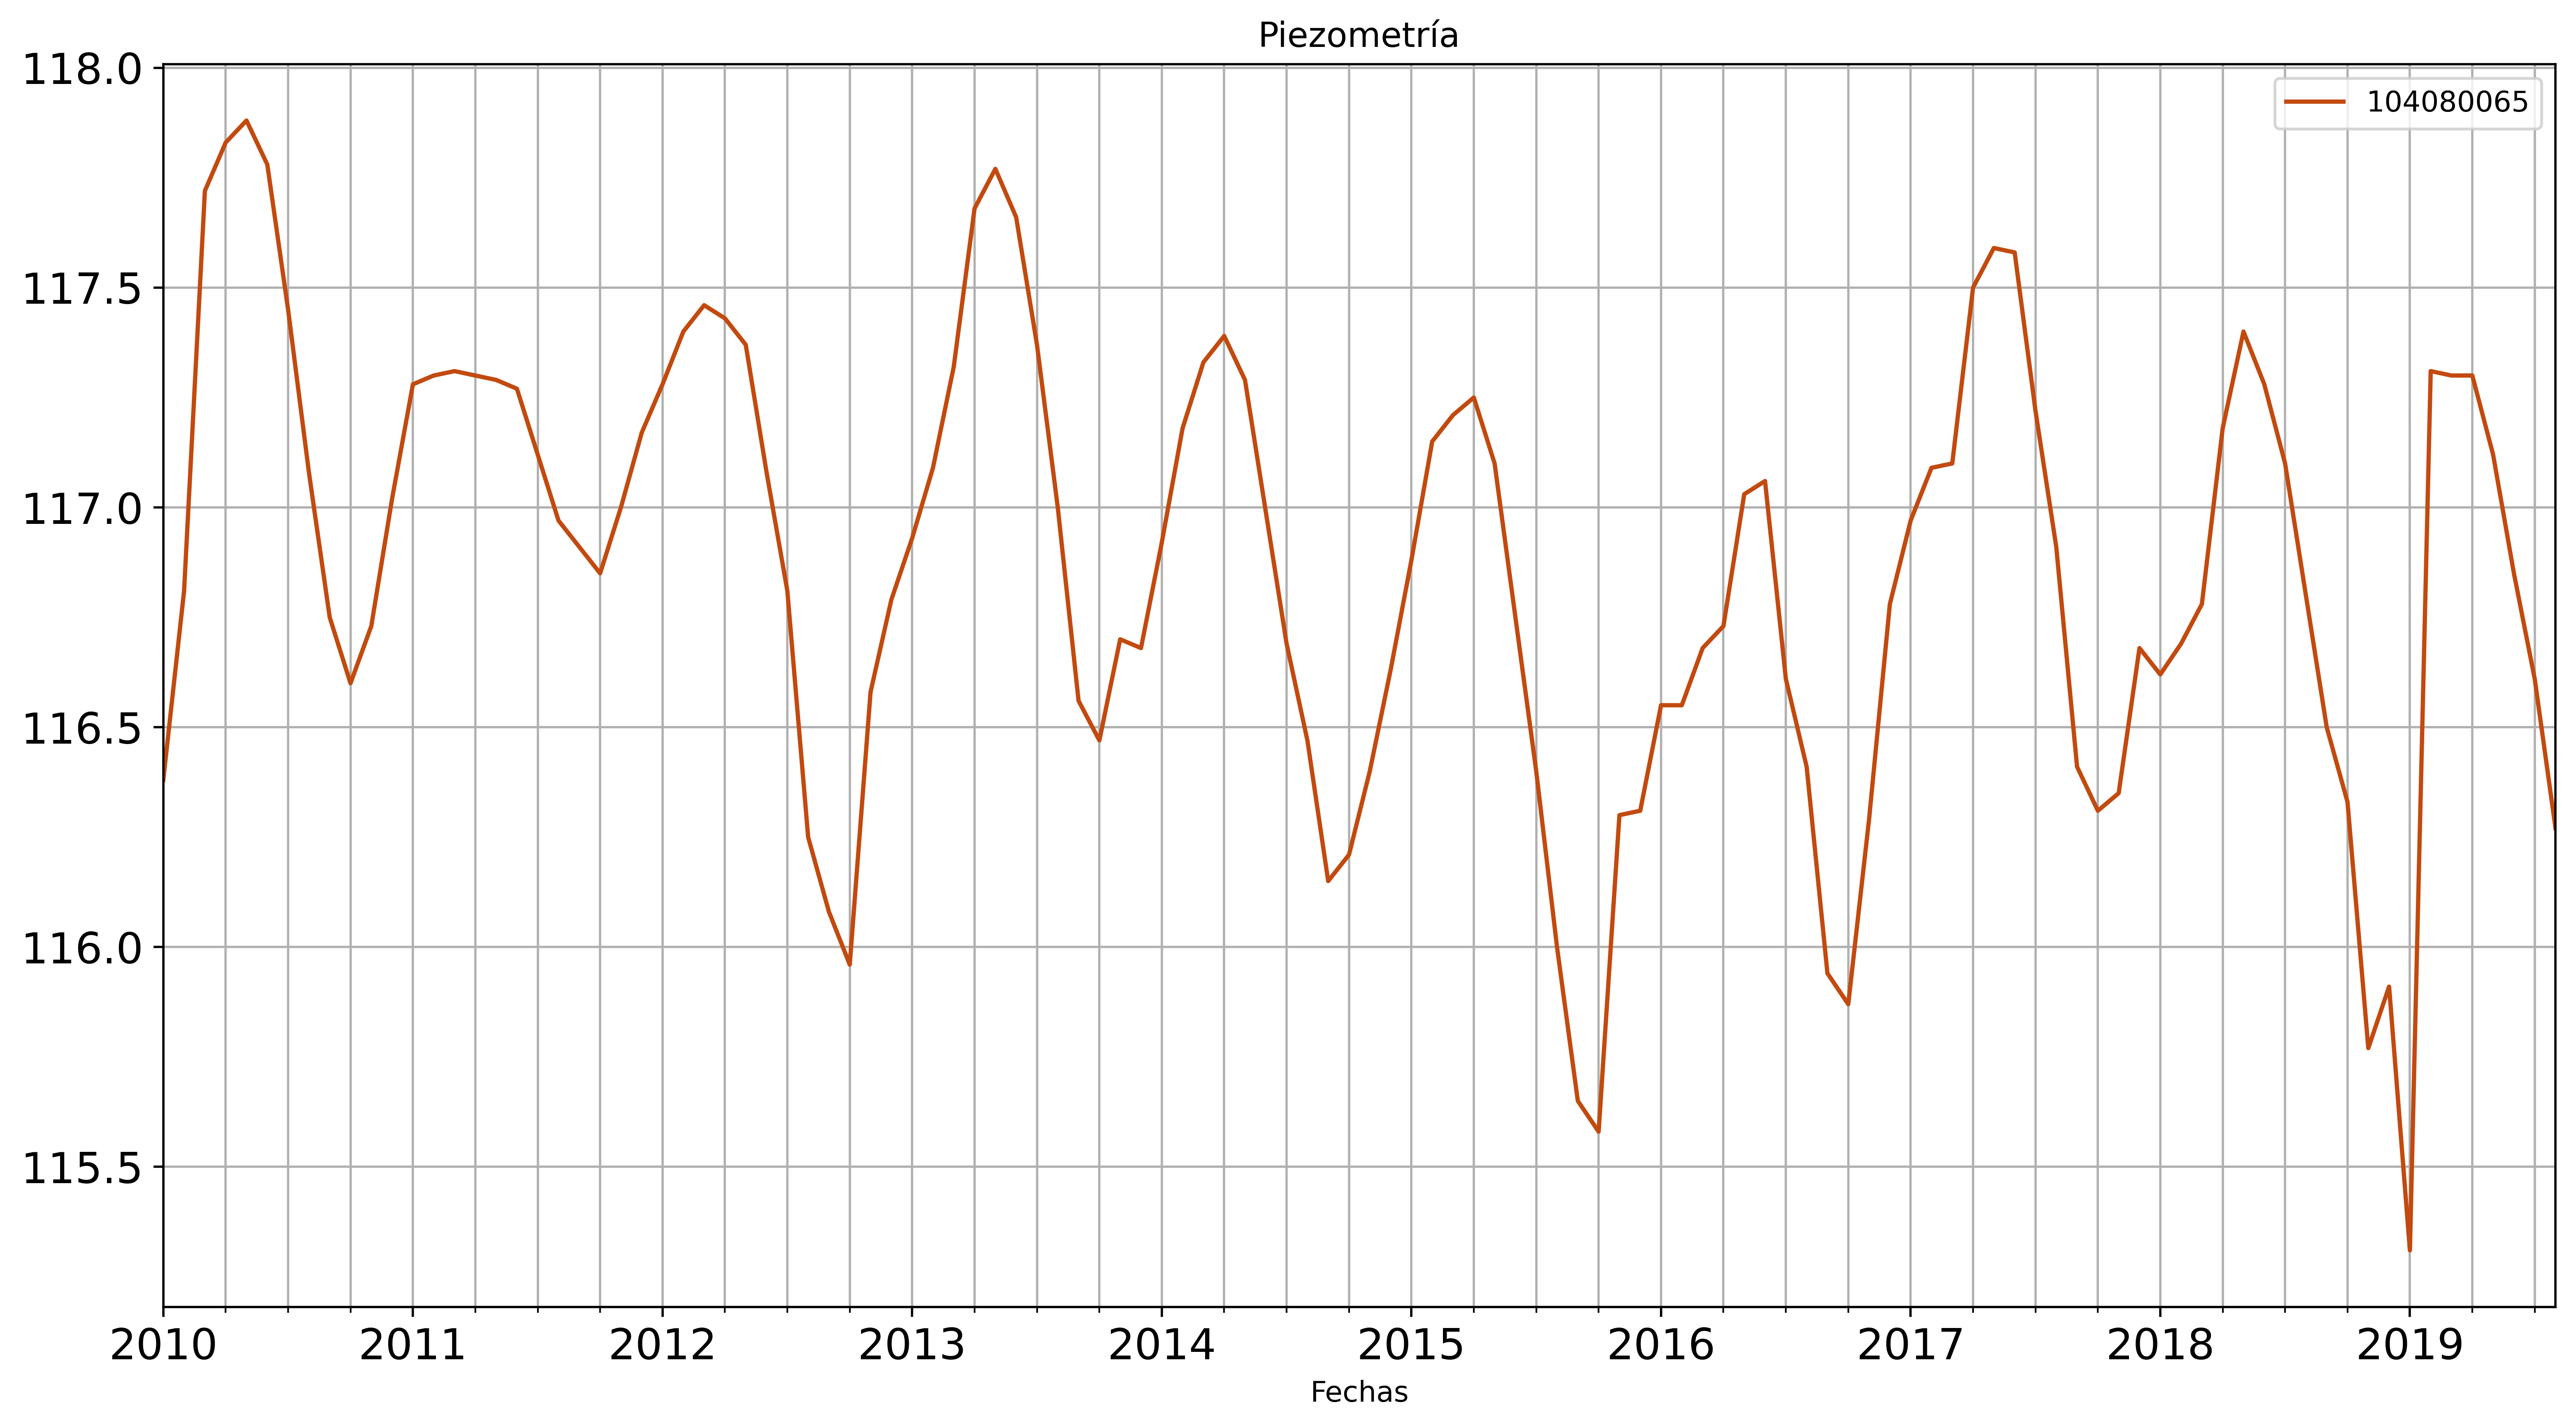

In [44]:
# Cojo el primer piezómetro de la base de datos de piezometría y ploteo su serie temporal
piezo = bbdd.piezos[0]
bbdd.plot(piezo)

# A través del método 'take' accedo al array con su serie tempral: --> bbdd.take(piezo)

<AxesSubplot:title={'center':'Estaciones pluviométricas'}, xlabel='Fechas', ylabel='Precipitación (mm)'>

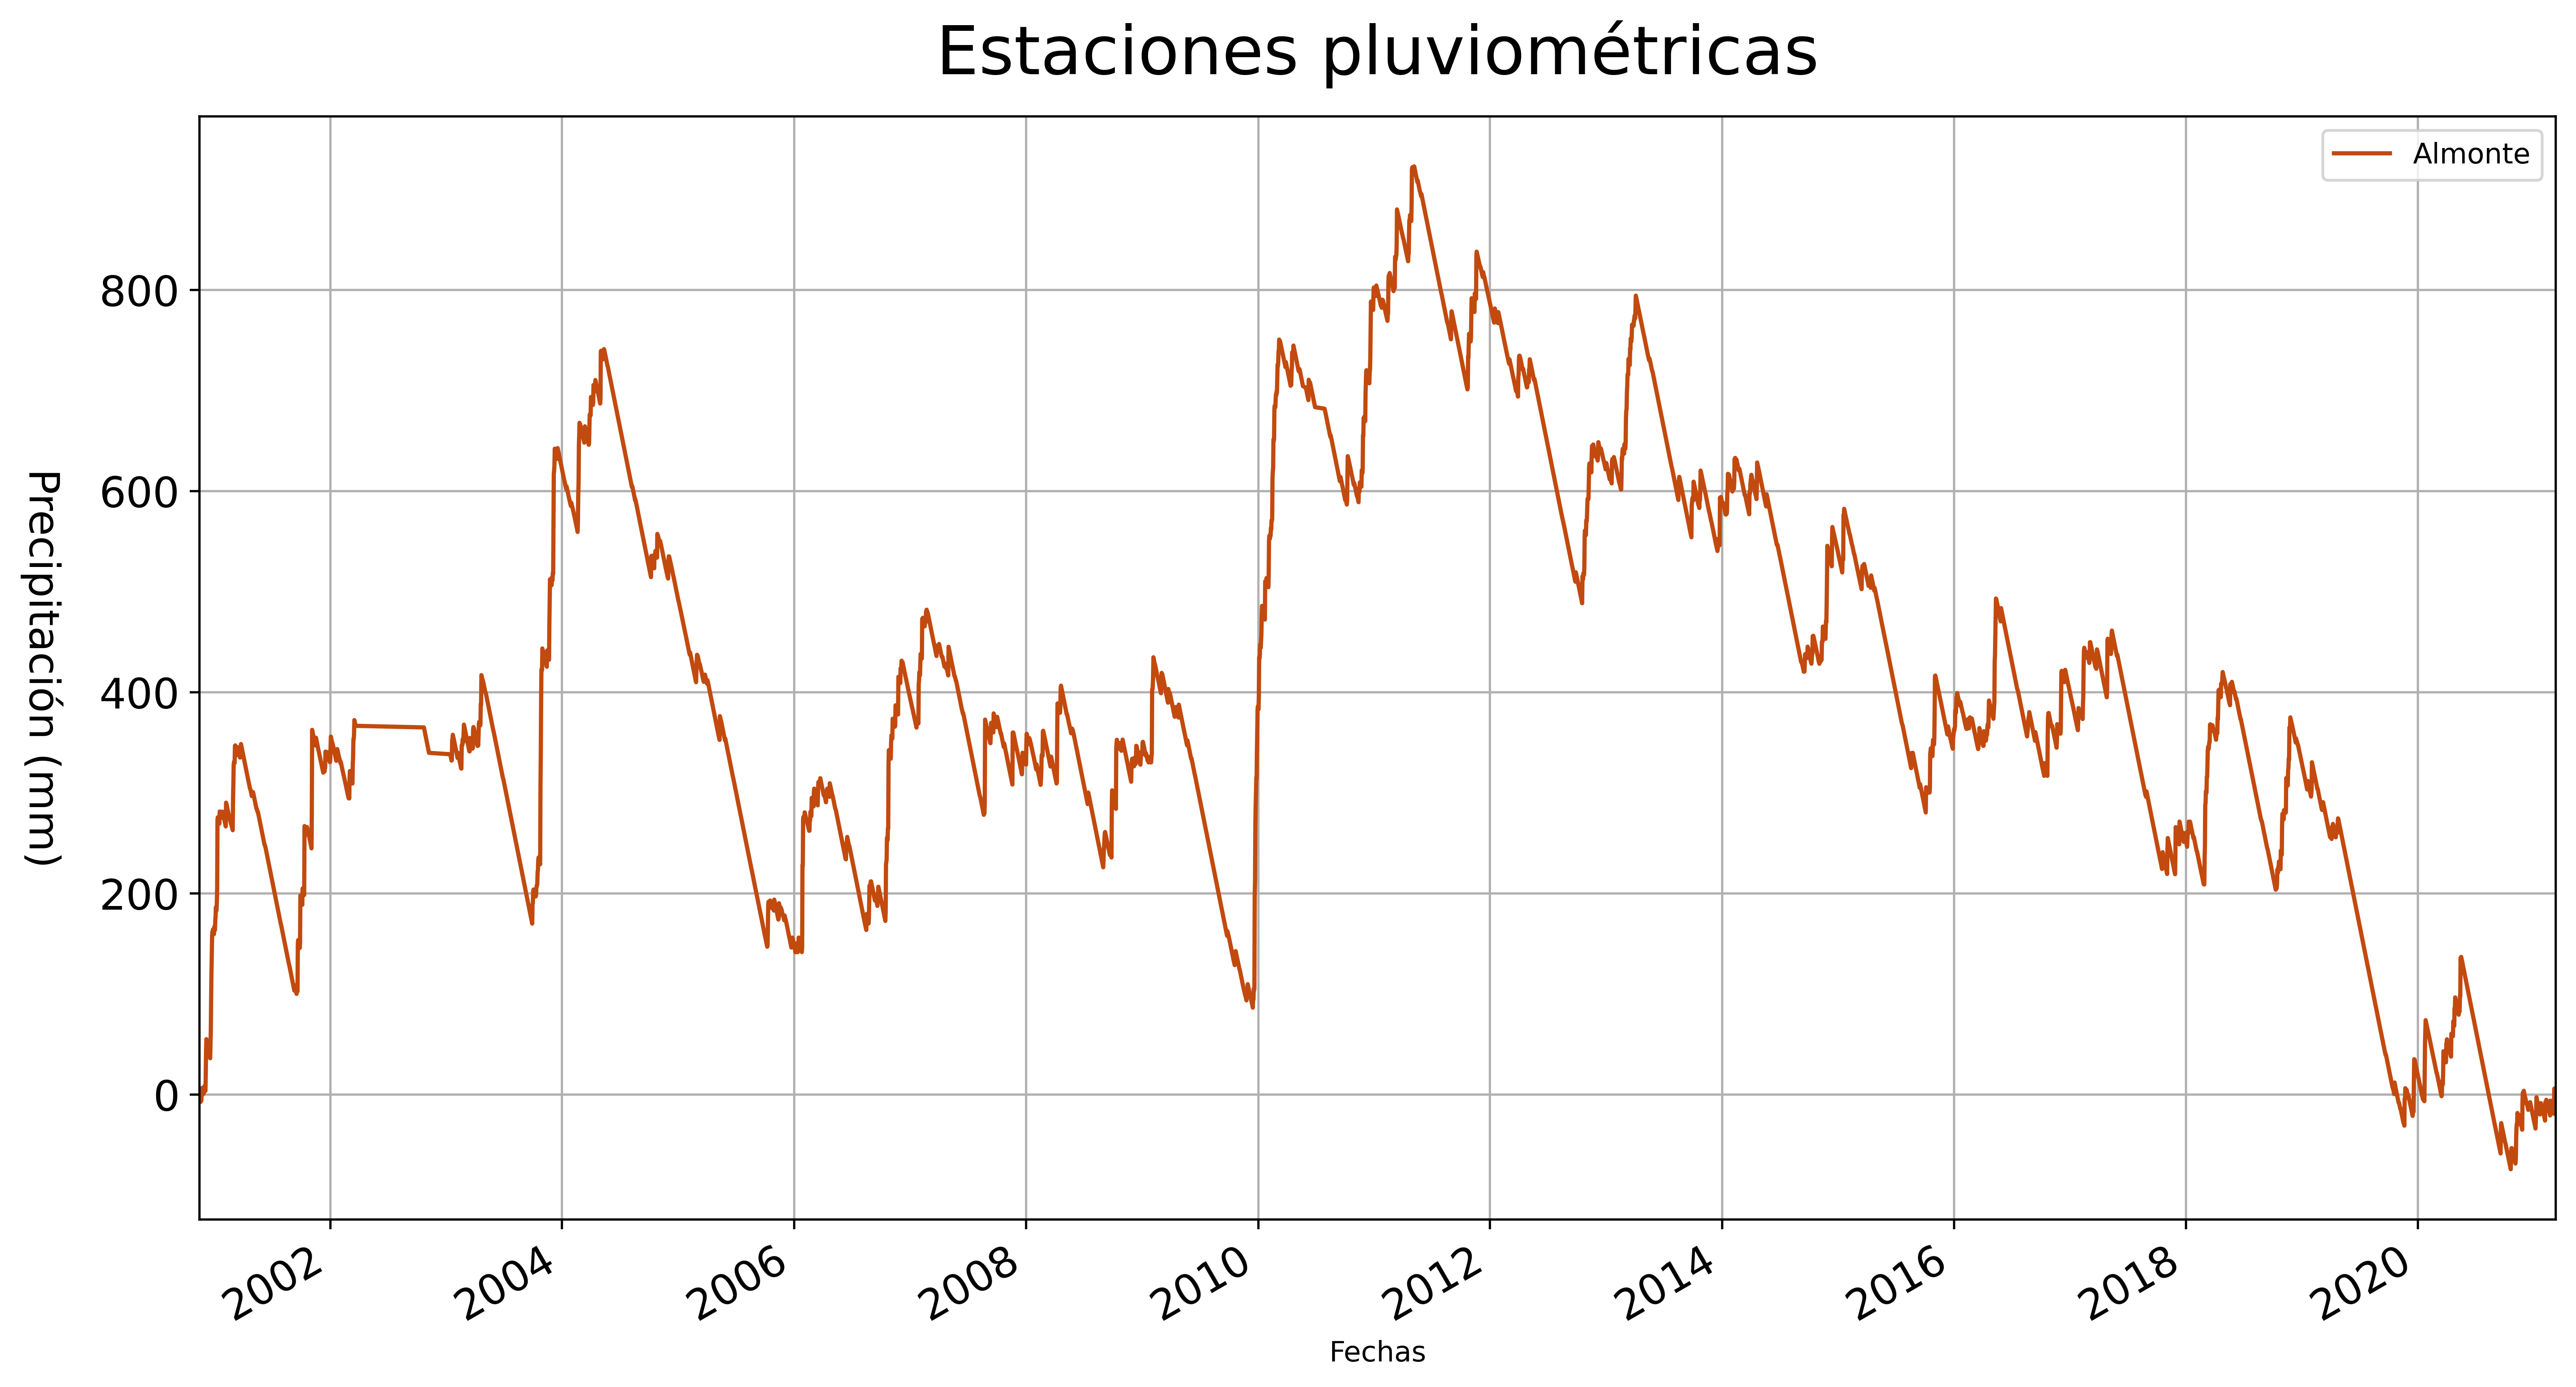

In [52]:
# Selecciono la estación de Almonte y ploteo su serie temporal según su desviación acumulada
# Puedo ver qué estaciones hay en la base de datos así: --> precipi.estaciones
precipi.plot('Almonte', values='dsv')

In [50]:
precipi.estaciones

['Almonte', 'La_Palma_del_Condado', 'Moguer', 'Niebla']